# Part 1

In [79]:
# Part 1: Data Exploration
import pandas as pd
from scipy import stats
import numpy as np



life_data = pd.read_csv("Life_Expectancy_Data_Fixed.csv")

life_data_no_expectancy = life_data.drop(columns=['Life.expectancy'])
expectancy = life_data['Life.expectancy']

print("Skewness :")
# uses fisher-pearson (similar to R 'skewnness")
num_data_skew = life_data_no_expectancy.select_dtypes(include=['float64', 'int64']).apply(lambda x: stats.skew(x))
print(num_data_skew.sort_values(ascending=False)) 



Skewness :
Population                         17.963660
infant.deaths                       9.781965
under.five.deaths                   9.490216
Measles                             9.436511
HIV.AIDS                            5.393357
percentage.expenditure              4.649676
GDP                                 3.541946
Adult.Mortality                     1.177298
Total.expenditure                   0.660771
Alcohol                             0.649246
BMI                                -0.229040
Schooling                          -0.634727
Income.composition.of.resources    -1.211907
Diphtheria                         -2.082502
Polio                              -2.107833
Hepatitis.B                        -2.280532
dtype: float64


In [75]:
from scipy.stats import shapiro

for col in numerical_cols:
    stat, p = shapiro(life_data[col])
    print(f'{p}: {col}')

#

1.594058635497751e-37: Adult.Mortality
1.7351773423887215e-76: infant.deaths
1.1329437146730975e-37: Alcohol
3.161392516610495e-71: percentage.expenditure
1.828194362814171e-61: Hepatitis.B
3.717564644985985e-77: Measles
1.418245931846894e-34: BMI
2.935118618409018e-76: under.five.deaths
3.9717364769724636e-59: Polio
1.598247701198844e-23: Total.expenditure
3.1876617424189557e-59: Diphtheria
7.513203756431755e-73: HIV.AIDS
2.4152850909037303e-67: GDP
7.326471078959153e-79: Population
8.788921224197882e-40: Income.composition.of.resources
9.621341354375832e-23: Schooling


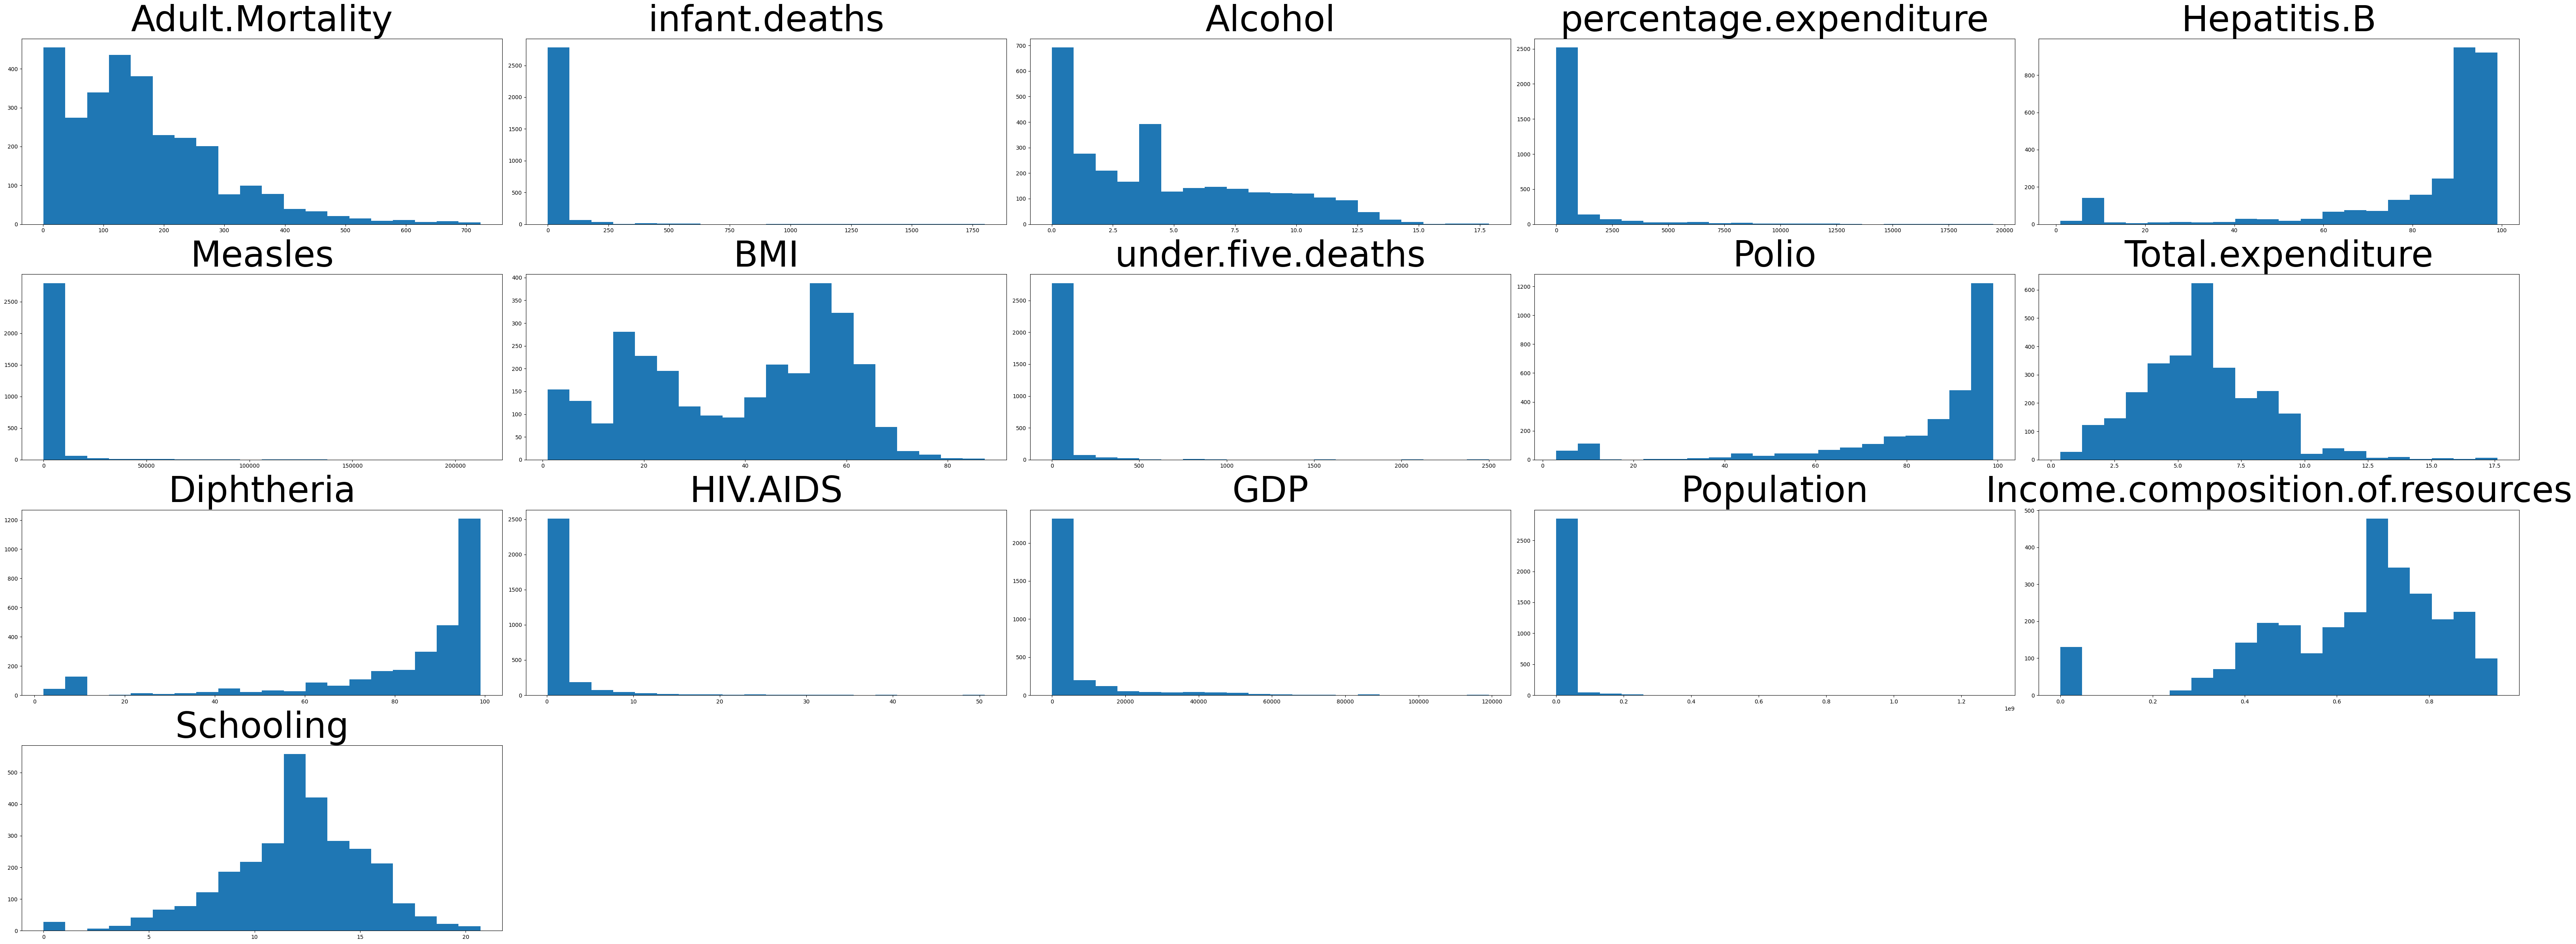

In [76]:
n_rows = (len(numerical_cols) + 5 - 1) // 5

plt.figure(figsize=(len(numerical_cols) * 4, n_rows * 6))
for i, col in enumerate(numerical_cols, 1):
    data = life_data[col]
    
    plt.subplot(n_rows, 5, i)
    plt.hist(data, bins=20)
    plt.title(f"{col}", fontsize=65)
    plt.tight_layout()

In [80]:
# log transform columns percentage.expenditure, Measles, HIV.AIDS, GDP, Population, infant.deaths
log_cols = ['percentage.expenditure', 'Measles', 'HIV.AIDS', 'GDP', 'Population', 'infant.deaths','under.five.deaths']
for col in log_cols:
    life_data_no_expectancy[col] = life_data_no_expectancy[col].apply(lambda x: x + 0.5)
    life_data_no_expectancy[col] = life_data_no_expectancy[col].apply(lambda x: np.log(x) if pd.notna(x) else x)



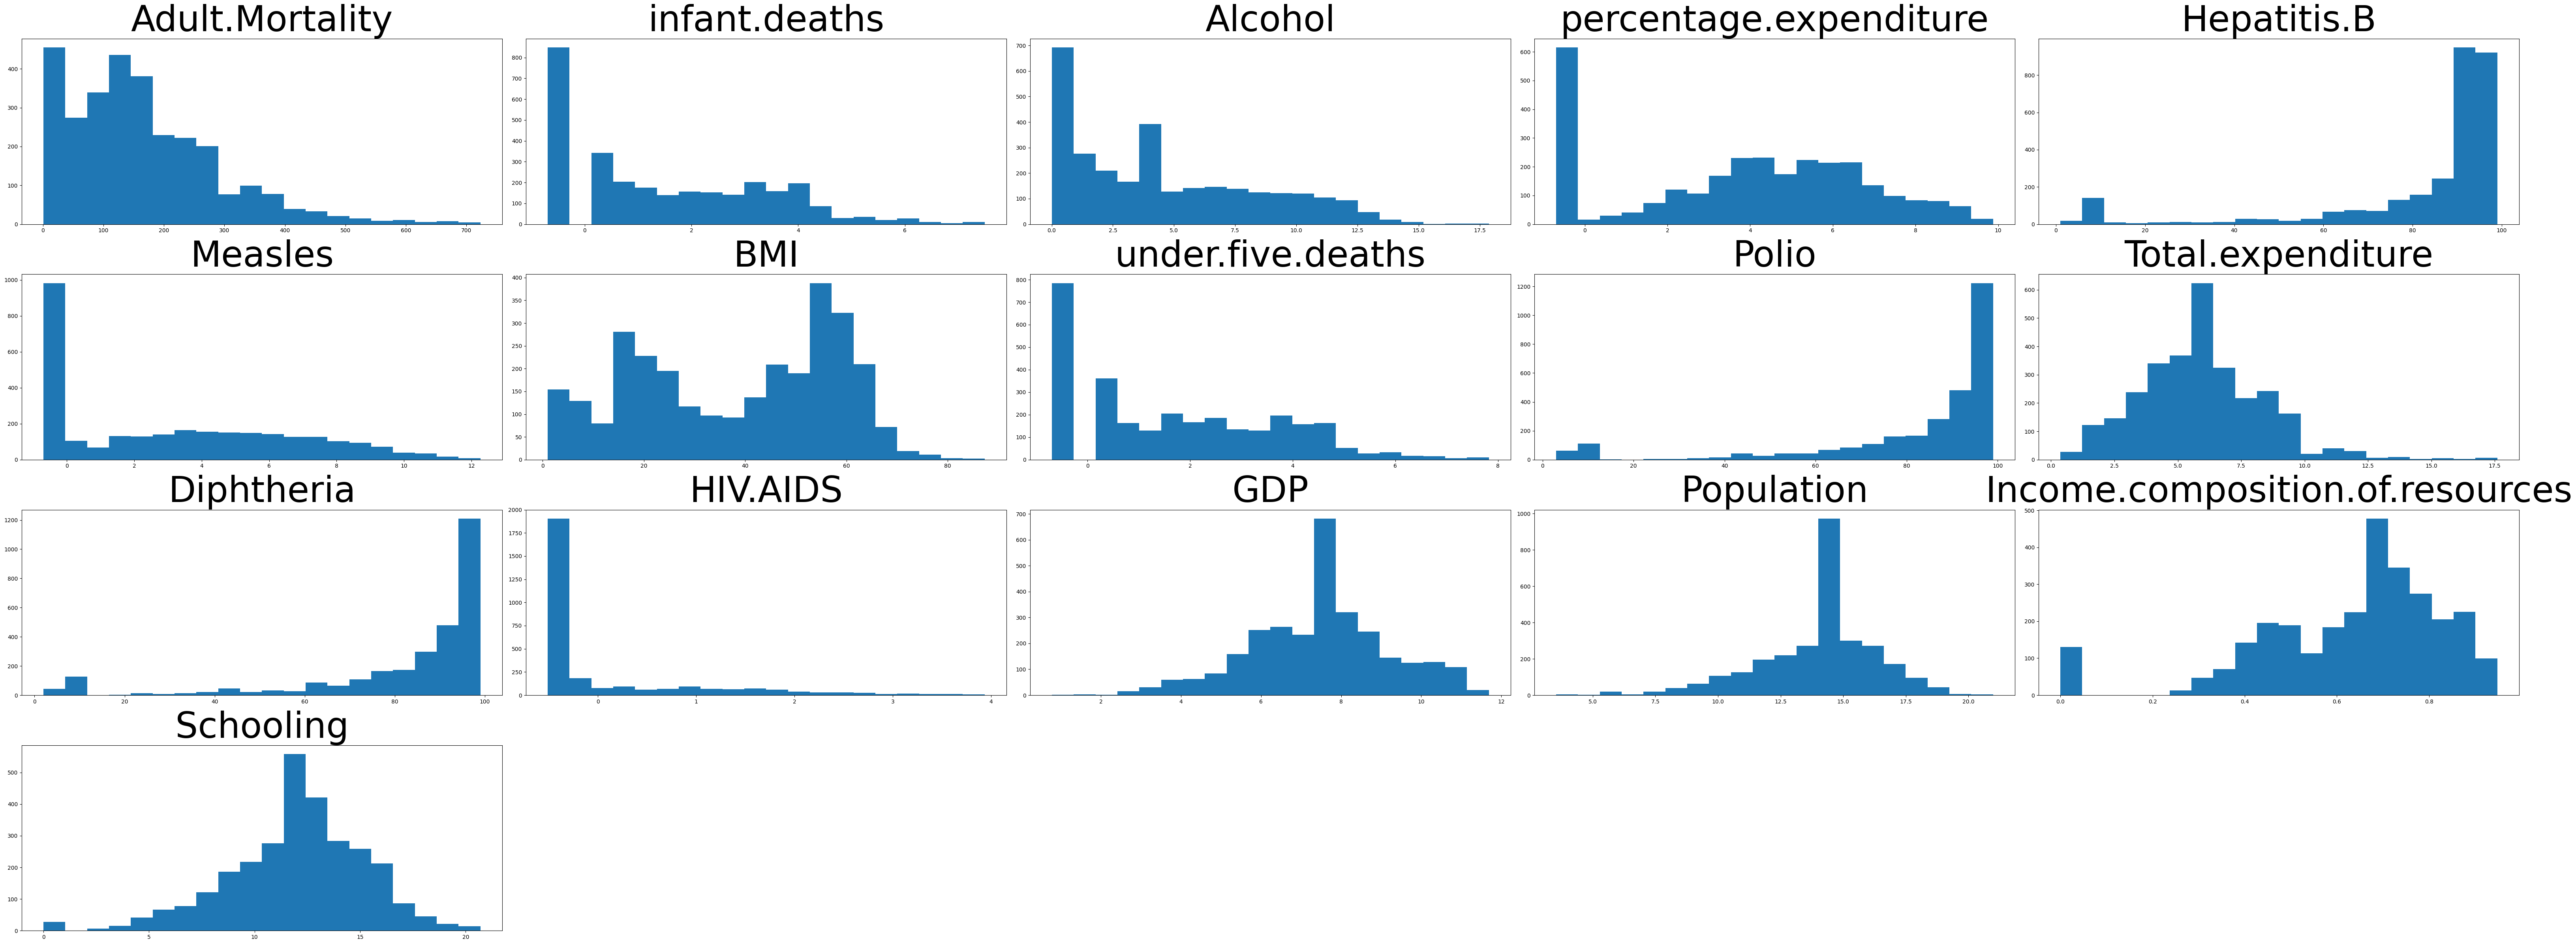

In [81]:
n_rows = (len(numerical_cols) + 5 - 1) // 5

plt.figure(figsize=(len(numerical_cols) * 4, n_rows * 6))
for i, col in enumerate(numerical_cols, 1):
    data = life_data_no_expectancy[col]
    
    plt.subplot(n_rows, 5, i)
    plt.hist(data, bins=20)
    plt.title(f"{col}", fontsize=65)
    plt.tight_layout()

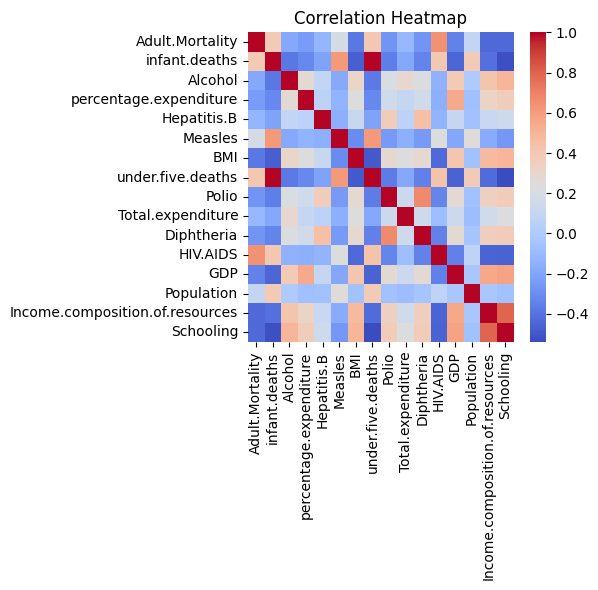

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# generates correlation heatmap
corr = life_data_no_expectancy[numerical_cols].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# computes VIF (multicolinearity measure) for all numeric columns
numerical_cols = life_data_no_expectancy.select_dtypes(include=['float64', 'int64']).columns.tolist()
for i, col in enumerate(numerical_cols):
    vif = variance_inflation_factor(life_data_no_expectancy[numerical_cols].values, i)
    print(f"{col}: {vif}")

Adult.Mortality: 4.812790681967572
infant.deaths: 181.29330395827674
Alcohol: 3.4057501028857264
percentage.expenditure: 3.958988056318574
Hepatitis.B: 16.85965298163018
Measles: 2.9479419001041314
BMI: 7.623365866291628
under.five.deaths: 198.05272830399974
Polio: 25.801047115020367
Total.expenditure: 7.657971950963428
Diphtheria: 28.021890956418904
HIV.AIDS: 2.1211073457615224
GDP: 36.42447951498807
Population: 34.29303950243843
Income.composition.of.resources: 31.488737296977785
Schooling: 48.805768555062805


## Part 1 Summary

The data as a relatively high degree of colinearity; per Shapiro-Wilk, a relatively high degree of lack of normalcy, and per Fisher-Pearson most columns also have a high degree of skewness. Visualizing the histograms gives some insight into the nature of transformations that might be prudent on top of the numerical analyses we've already done.

To have optimal model performance, severely right skew will be log-transformed, severely left skew will be exponentially transformed, highly multi-colinear features would be dropped and colinear pairs will be analyzed with one element potentially dropped. 



In [ ]:
life_data_no_expectancy.head()

,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,Income.composition.of.resources,Schooling
0,263,4.135167,0.01,4.273601,1.694889e+28,7.051423,19.1,83,6,8.16,1.694889e+28,-0.510826,6.371200,17.334091,0.479,10.1
1,271,4.166665,0.01,4.304384,8.438357e+26,6.199494,18.6,86,58,8.18,8.438357e+26,-0.510826,6.418685,12.699495,0.476,10.0
2,268,4.197202,0.01,4.300264,6.235149e+27,6.064947,18.1,89,62,8.13,6.235149e+27,-0.510826,6.449277,17.272826,0.470,9.9
3,272,4.241327,0.01,4.365443,1.252363e+29,7.932900,17.6,93,67,8.52,1.252363e+29,-0.510826,6.507963,15.123021,0.463,9.8
4,275,4.269697,0.01,2.027768,3.404276e+29,8.010857,17.2,97,68,7.87,3.404276e+29,-0.510826,4.159465,14.906964,0.454,9.5


# Part 2

In [116]:
import statsmodels.api as sm

# naive aproach on all predictors

X = life_data_no_expectancy[numerical_cols]
Y = expectancy
X = sm.add_constant(X)  

# create test splits etc for OLS model
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42
)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Intercept:", model.intercept_)
print(model.coef_)
print(X_train.columns)


Mean Squared Error: 12.036981651307244
R^2 Score: 0.8611128697757056
Intercept: 56.00261971029257
[ 0.00000000e+00 -1.46607961e-02  1.50424913e+00  1.05402163e-01
  1.07893445e-01 -1.65268820e-02  4.31970319e-04  1.04312988e-02
 -2.13370220e+00  1.50858429e-02  1.10161177e-01  3.22896469e-02
 -3.87686651e+00  2.79969894e-01  1.14374357e-01  7.44893133e+00
  3.58966534e-01]
Index(['const', 'Adult.Mortality', 'infant.deaths', 'Alcohol',
       'percentage.expenditure', 'Hepatitis.B', 'Measles', 'BMI',
       'under.five.deaths', 'Polio', 'Total.expenditure', 'Diphtheria',
       'HIV.AIDS', 'GDP', 'Population', 'Income.composition.of.resources',
       'Schooling'],
      dtype='object')


The naive model, simply log-transforming some variables, is suprisingly strong with an R-squared of 0.86. 

Based on the VIF and heatmap, we'll start by dropping infant deaths, schooling, and GDP to try to improve the model through reduction in colinearity. 

In [104]:
#Based on the VIF and heatmap, we'll start by dropping infant deaths, schooling, and GDP.

# Dropping the identified columns
columns_to_drop = ['infant.deaths', 'Schooling', 'GDP', 'Population', 'under.five.deaths']
life_data_no_expectancy_dropped = life_data_no_expectancy.drop(columns=columns_to_drop) 
numerical_cols_dropped = life_data_no_expectancy_dropped.select_dtypes(include=['float64', 'int64']).columns.tolist()

# retrain a moodel without the dropped columns
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(
    life_data_no_expectancy_dropped[numerical_cols_dropped],
    expectancy,
    test_size=0.2,
    random_state=7
)
model_drop = LinearRegression()
model_drop.fit(X_train_dropped, y_train_dropped)

Y_pred_drop = model_drop.predict(X_test_dropped)

mse_drop = mean_squared_error(y_test_dropped, Y_pred_drop)
r2_drop = r2_score(y_test_dropped, Y_pred_drop)

print("Mean Squared Error:", mse_drop)
print("R^2 Score:", r2_drop)
print("Intercept:", model_drop.intercept_)
print(model_drop.coef_)
print(X_train_dropped.columns)

Mean Squared Error: 14.158242881387187
R^2 Score: 0.8476645682073812
Intercept: 57.45321523584646
[-0.01552965  1.87851052  0.14709601  0.12173024 -0.01562363  0.02734139
  0.01845649 -2.58800102  0.02052408  0.15201471  0.03409423 -3.74672068
  0.32406468  0.10739982  9.7173169 ]
Index(['Adult.Mortality', 'infant.deaths', 'Alcohol', 'percentage.expenditure',
       'Hepatitis.B', 'Measles', 'BMI', 'under.five.deaths', 'Polio',
       'Total.expenditure', 'Diphtheria', 'HIV.AIDS', 'GDP', 'Population',
       'Income.composition.of.resources'],
      dtype='object')


The model's performance actually decreased dropping the highly colinear features, so it might make sense to instead try Ridge and LASSO regression, wherein the feature selection will be done for us.

In [114]:
from sklearn.linear_model import Ridge

# scale the data for Ridge and Lasso regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, Y_train)
Y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)
print("Ridge MSE:", mse_ridge)
print("Ridge R^2 Score:", r2_ridge)


from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, Y_train)
Y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)
print("LASSO MSE:", mse_lasso)
print("LASSO R^2 Score:", r2_lasso)

Ridge MSE: 12.043030386660442
Ridge R^2 Score: 0.8610430772380887
LASSO MSE: 12.19852754575465
LASSO R^2 Score: 0.8592488937118324


In [115]:
print(lasso_model.coef_)
print(ridge_model.coef_)


[ 0.         -1.80532451 -0.          0.3567687   0.25670065 -0.21332466
 -0.          0.22119407 -1.29192334  0.29713263  0.19751659  0.68350654
 -3.79659752  0.48548385  0.13649304  1.48842437  1.25557356]
[ 0.00000000e+00 -1.83488742e+00  2.53262574e+00  4.08615646e-01
  3.16273653e-01 -3.77915076e-01  4.99858241e-04  2.10820259e-01
 -3.94671421e+00  3.52118144e-01  2.65875372e-01  7.67139636e-01
 -3.74557336e+00  4.81150001e-01  2.66932796e-01  1.50276207e+00
  1.17231942e+00]


Strictly speaking, both the ridge and lasso models are marginaly worse but very, very similar in performance to the naive model (using OLS) just with normalization. 

# Part 3

All models are relatively succesful in predicting life expectancy (with the worst R^2), but surprisngly, the strongest model was just that which had log-transformed variables. The surprisngly similar performance across OLS, Ridge, and LASSO regressions indicate the model is likely very stable. Best practices typically dictate removing highly multicolinear variables but degradation of model performance is a sufficient reason to keep the predictors. Examining the coefficients of the OLS model is uniquely easy: Income.composition.of.resources and 'HIV.AIDS' are two very interpretable predictors where higher income means hgiher life expectancy, and as HIV/AIDS are associated with lower lifespans, higher inciedences of these diseases will logically reduce lifespan sifgnificantly, especially in some countries (e.g. northern Africa) where incidence is especially high relative to the population. Many of the colinear variables have very low coefficients: Measles, BMI, and Polio are have higher VIF values, which intuitively makes sense as their contributions towards the model are "split"/distributed.

The relative performance of the two regularized models reaffirms that multicolinearity does not impact model performance. Additionally, examining the coefficients of these models, it's clear that Ridge regression did not majorly reduce many coefficients, and that LASSO regression only dropped 3 predictors (which is somewhat surprising, considering more than 3 variables had VIF scores significantly above 5). Lastly, this reflects that the underlying data relationships are relatively linear and relatively well-specified: further model performance cannot likely be gained through regularization and these methods mostly contribute to stabilization of coefficients more than anything. 